In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import chardet

with open("Sample - Superstore.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Read a chunk of the file
    encoding = result["encoding"]

df = pd.read_csv("Sample - Superstore.csv", encoding=encoding)


In [13]:

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [15]:
df["Postal Code"].fillna(0,  inplace = True)

In [16]:

df ["Postal Code"] = df["Postal Code"].astype(int)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int32  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [18]:
if df.duplicated().sum() > 0: #
    print("Duplicate exists")
else:
    print("Doesn't Exist")

Doesn't Exist


In [19]:
df.head(100)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2017-109484,11/6/2017,11/12/2017,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,...,97206,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.6820,1,0.70,-3.7880
96,97,CA-2017-161018,11/9/2017,11/11/2017,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,...,10009,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.5300,7,0.00,40.5426
97,98,CA-2017-157833,6/17/2017,6/20/2017,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,...,94122,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.3120,3,0.20,17.9592
98,99,CA-2016-149223,9/6/2016,9/11/2016,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,...,55106,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.8800,6,0.00,22.5852


In [20]:
#types of customers
types_of_customers = df['Segment'].unique()
print (types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [21]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment' : 'Type Of Customer'})
     

In [22]:
print (number_of_customers)

  Type Of Customer  count
0         Consumer   5191
1        Corporate   3020
2      Home Office   1783


([<matplotlib.patches.Wedge at 0x25625b7e110>,
 [Text(-0.06704018356682018, 1.0979551966211223, 'Consumer'),
  Text(-0.5268843289816147, -0.9656049419268699, 'Corporate'),
  Text(0.9316986195588344, -0.5847543777622897, 'Home Office')],
 [Text(-0.03656737285462918, 0.5988846527024302, '51.9%'),
  Text(-0.28739145217178985, -0.5266936046873835, '30.2%'),
  Text(0.5081992470320914, -0.31895693332488523, '17.8%')])

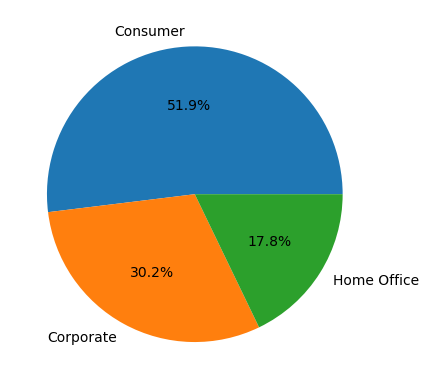

In [24]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type Of Customer'], autopct='%1.1f%%')

  Type Of Customer   Total Sales
0         Consumer  1.161401e+06
1        Corporate  7.061464e+05
2      Home Office  4.296531e+05


<BarContainer object of 3 artists>

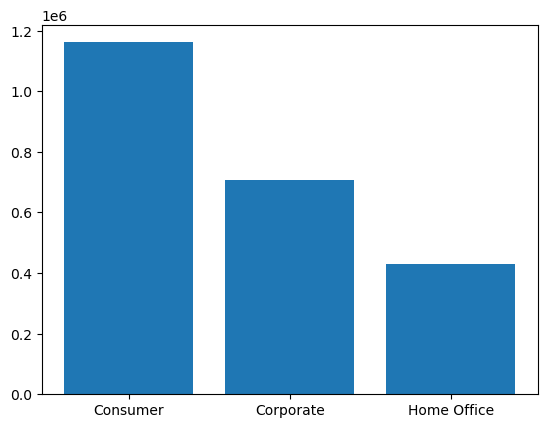

In [25]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Type Of Customer', 'Sales' : 'Total Sales'})

print(sales_per_segment)

plt.bar(sales_per_segment['Type Of Customer'], sales_per_segment['Total Sales'])

([<matplotlib.patches.Wedge at 0x256256cf490>,
 [Text(-0.019255774590196492, 1.0998314485160587, 'Consumer'),
  Text(-0.5936661576864369, -0.9260456215639825, 'Corporate'),
  Text(0.9155113363994682, -0.609786022243918, 'Home Office')],
 [Text(-0.010503149776470813, 0.599908062826941, '50.6%'),
  Text(-0.3238179041926019, -0.5051157935803541, '30.7%'),
  Text(0.4993698198542553, -0.33261055758759156, '18.7%')])

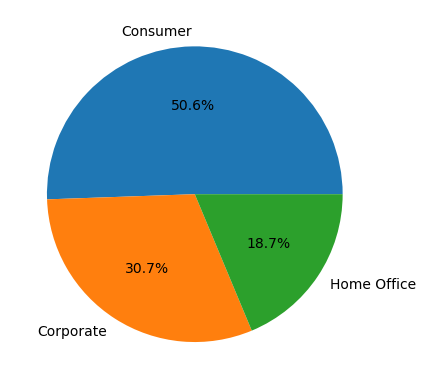

In [26]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Type Of Customer'], autopct='%1.1f%%')
     

In [27]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [28]:
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
     

In [29]:
customers_order_frequency.rename(columns={'Order ID' : 'Total Orders'}, inplace = True)

In [30]:
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] >= 1]

In [31]:
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending = False)

In [32]:
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            37
1     PP-18955           Paul Prost  Home Office            34
2     JL-15835             John Lee     Consumer            34
3     MA-17560         Matt Abelman  Home Office            34
4     SV-20365          Seth Vernon     Consumer            32
5     JD-15895     Jonathan Doherty    Corporate            32
6     CK-12205  Chloris Kastensmidt     Consumer            32
7     EH-13765         Edward Hooks    Corporate            32
8     EP-13915           Emily Phan     Consumer            31
9     ZC-21910     Zuschuss Carroll     Consumer            31
10    AP-10915       Arthur Prichep     Consumer            31
11    LC-16870        Lena Cacioppo     Consumer            30


In [33]:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
     

In [34]:
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

In [35]:
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


In [36]:
types_of_customers = df['Ship Mode'].unique()
print(types_of_customers)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [37]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [38]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index':'Use Frequency', 'Ship Mode':'Mode Of Shipment', 'count' : 'Use Frequency'})
print(shipping_model)

  Mode Of Shipment  Use Frequency
0   Standard Class           5968
1     Second Class           1945
2      First Class           1538
3         Same Day            543


([<matplotlib.patches.Wedge at 0x25626183fd0>,
 [Text(-0.33056573952035373, 1.0491550370919267, 'Standard Class'),
  Text(-0.37607764230951635, -1.0337144707098356, 'Second Class'),
  Text(0.7465348771572817, -0.8078896441889587, 'First Class'),
  Text(1.0840144265772789, -0.18684946607452133, 'Same Day')],
 [Text(-0.1803085851929202, 0.5722663838683235, '59.7%'),
  Text(-0.20513325944155433, -0.5638442567508194, '19.5%'),
  Text(0.40720084208579, -0.4406670786485229, '15.4%'),
  Text(0.5912805963148793, -0.10191789058610252, '5.4%')])

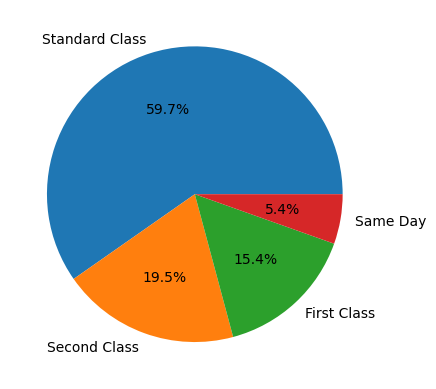

In [39]:
plt.pie(shipping_model['Use Frequency'], labels=shipping_model['Mode Of Shipment'], autopct='%1.1f%%')

In [40]:

state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index':'State', 'State':'Number Of Customers'})
print(state.head(20))

   Number Of Customers  count
0           California   2001
1             New York   1128
2                Texas    985
3         Pennsylvania    587
4           Washington    506
5             Illinois    492
6                 Ohio    469
7              Florida    383
8             Michigan    255
9       North Carolina    249
10             Arizona    224
11            Virginia    224
12             Georgia    184
13           Tennessee    183
14            Colorado    182
15             Indiana    149
16            Kentucky    139
17       Massachusetts    135
18          New Jersey    130
19              Oregon    124


In [41]:
city = df['City'].value_counts().reset_index()
print(city.head(25))

             City  count
0   New York City    915
1     Los Angeles    747
2    Philadelphia    537
3   San Francisco    510
4         Seattle    428
5         Houston    377
6         Chicago    314
7        Columbus    222
8       San Diego    170
9     Springfield    163
10         Dallas    157
11   Jacksonville    125
12        Detroit    115
13         Newark     95
14       Richmond     90
15        Jackson     82
16       Columbia     81
17         Aurora     68
18        Phoenix     63
19     Long Beach     61
20      Arlington     60
21    San Antonio     59
22          Miami     57
23     Louisville     57
24      Rochester     53


In [42]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

In [43]:
top_sales = state_sales.sort_values(by='Sales', ascending=False)

In [44]:
print(top_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


In [45]:
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values (by='Sales', ascending=False)
print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  256368.1610
1    Los Angeles  175851.3410
2        Seattle  119540.7420
3  San Francisco  112669.0920
4   Philadelphia  109077.0130
5        Houston   64504.7604
6        Chicago   48539.5410
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9    Springfield   43054.3420


In [46]:
state_city_sales = df.groupby(['State', 'City'])['Sales'].sum().reset_index()
print(state_city_sales.head(20))

      State           City      Sales
0   Alabama         Auburn   1766.830
1   Alabama        Decatur   3374.820
2   Alabama       Florence   1997.350
3   Alabama         Hoover    525.850
4   Alabama     Huntsville   2484.370
5   Alabama         Mobile   5462.990
6   Alabama     Montgomery   3722.730
7   Alabama     Tuscaloosa    175.700
8   Arizona       Avondale    946.808
9   Arizona  Bullhead City     22.288
10  Arizona       Chandler   1076.747
11  Arizona        Gilbert   4172.382
12  Arizona       Glendale   2917.865
13  Arizona           Mesa   4037.740
14  Arizona         Peoria   1341.352
15  Arizona        Phoenix  11000.257
16  Arizona     Scottsdale   1466.307
17  Arizona   Sierra Vista     76.072
18  Arizona          Tempe   1070.302
19  Arizona         Tucson   6313.016


In [47]:
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [48]:
df.head(100)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2017-109484,11/6/2017,11/12/2017,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,...,97206,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.6820,1,0.70,-3.7880
96,97,CA-2017-161018,11/9/2017,11/11/2017,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,...,10009,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.5300,7,0.00,40.5426
97,98,CA-2017-157833,6/17/2017,6/20/2017,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,...,94122,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.3120,3,0.20,17.9592
98,99,CA-2016-149223,9/6/2016,9/11/2016,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,...,55106,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.8800,6,0.00,22.5852


In [49]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [50]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending = False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [51]:
subcategory_count_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending = False)
     

In [52]:
print(subcategory_count_sales)

           Category Sub-Category        Sales
16       Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
11  Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
6   Office Supplies      Binders  203412.7330
15       Technology     Machines  189238.6310
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
0         Furniture    Bookcases  114879.9963
4   Office Supplies   Appliances  107532.1610
2         Furniture  Furnishings   91705.1640
10  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
5   Office Supplies          Art   27118.7920
7   Office Supplies    Envelopes   16476.4020
9   Office Supplies       Labels   12486.3120
8   Office Supplies    Fasteners    3024.2800


In [53]:
product_category = df.groupby(['Category'])['Sales'].sum().reset_index()
top_product_category = product_category.sort_values(by='Sales', ascending = False)
print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


([<matplotlib.patches.Wedge at 0x256261fe590>,
 [Text(0.45585027961816843, 1.00109965666363, 'Technology'),
  Text(-1.0859233062515894, -0.17541542959391293, 'Furniture'),
  Text(0.609660527768593, -0.9155949109081596, 'Office Supplies')],
 [Text(0.2486456070644555, 0.5460543581801618, '36.4%'),
  Text(-0.5923218034099578, -0.0956811434148616, '32.3%'),
  Text(0.3325421060555962, -0.4994154059499052, '31.3%')])

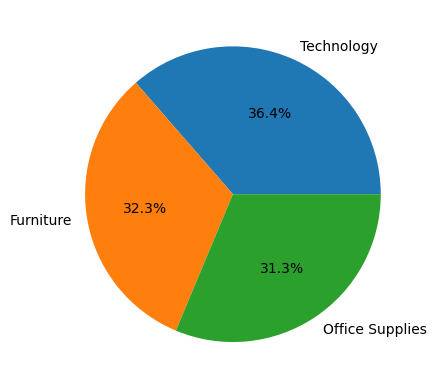

In [54]:
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%')

<BarContainer object of 17 artists>

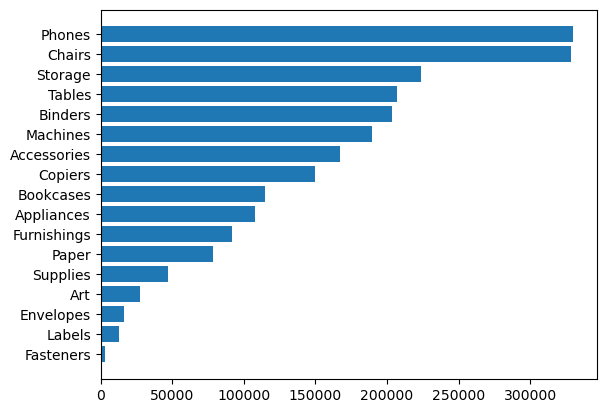

In [77]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending = True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])

In [87]:
new_data = {
    'Order Date': ['05/06/2015', '09/23/2016', '15/04/2017', '04/15/2017', '2017-06-20', '12/31/2017', '01-02-2018'],
    'Sales': [500, 600, 100, 200, 150, 300, 250]
}

df = pd.DataFrame(new_data)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True, errors='coerce')

yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales': 'Total Sales'})

print(yearly_sales)


   Year  Total Sales
0  2015          500
1  2016          600
2  2017          750
3  2018          250


<BarContainer object of 4 artists>

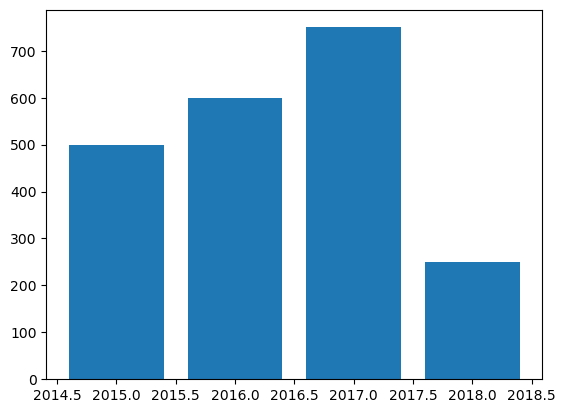

In [88]:
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

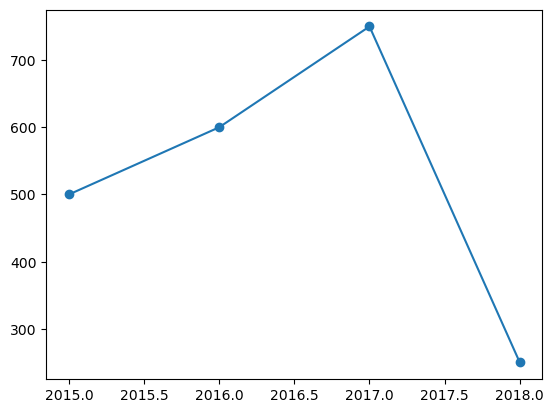

In [89]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')

In [98]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
year_sales = df[df['Order Date'].dt.year == 2017]
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns = {'Order Date': 'Quarter', 'Sales' : 'Total Sales'})
print(quarterly_sales)

     Quarter  Total Sales
0 2017-06-30          450
1 2017-09-30            0
2 2017-12-31          300


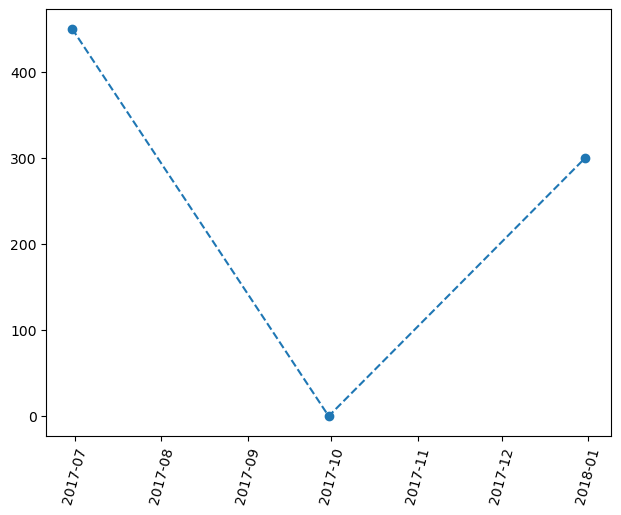

In [99]:
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker = 'o', linestyle = '--')

plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [106]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
yearly_sales = df[df['Order Date'].dt.year == 2017]
monthly_sales = yearly_sales.resample('M', on = 'Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales' : 'Total Monthly Sales'})

print (monthly_sales)

       Month  Total Monthly Sales
0 2017-04-30                  300
1 2017-05-31                    0
2 2017-06-30                  150
3 2017-07-31                    0
4 2017-08-31                    0
5 2017-09-30                    0
6 2017-10-31                    0
7 2017-11-30                    0
8 2017-12-31                  300


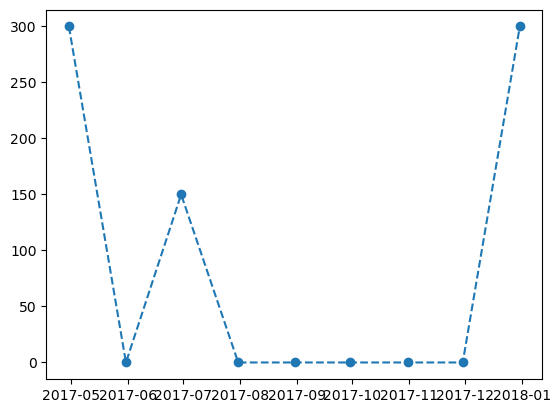

In [102]:
plt.plot(monthly_sales['Month'], monthly_sales['Total Monthly Sales'], marker = 'o', linestyle = '--')
     